In [1]:
# @title import library

import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import cv2
import pickle
import time

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.preprocessing import image
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle



In [2]:
# @title import drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
# @title load dataset
train_dir = "/content/drive/MyDrive/PandasBears/Train"
test_dir = "/content/drive/MyDrive/PandasBears/Test"

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

test_datagen = ImageDataGenerator(rescale=1./255)


train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)
print(train_generator.class_indices)

Found 100 images belonging to 2 classes.
Found 100 images belonging to 2 classes.
{'Bears': 0, 'Pandas': 1}


In [8]:
# @title Model
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    BatchNormalization(),
    MaxPooling2D(2,2),

    Conv2D(64, (3,3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2,2),

    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

# Compile model
model.compile(
    loss='binary_crossentropy',
    optimizer=Adam(learning_rate=0.0001),
    metrics=['accuracy']
)

# Training model
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=test_generator
)

Epoch 1/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 16s 3s/step - accuracy: 0.3646 - loss: 5.3268 - val_accuracy: 0.6600 - val_loss: 0.6543
Epoch 2/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 14s 4s/step - accuracy: 0.6595 - loss: 1.2741 - val_accuracy: 0.5000 - val_loss: 0.6914
Epoch 3/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 12s 3s/step - accuracy: 0.6515 - loss: 1.2444 - val_accuracy: 0.6000 - val_loss: 0.6302
Epoch 4/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 11s 3s/step - accuracy: 0.8840 - loss: 0.2845 - val_accuracy: 0.9400 - val_loss: 0.6139
Epoch 5/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 12s 3s/step - accuracy: 0.8441 - loss: 0.4095 - val_accuracy: 0.9300 - val_loss: 0.5949
Epoch 6/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 12s 4s/step - accuracy: 0.9491 - loss: 0.1503 - val_accuracy: 0.7600 - val_loss: 0.5832
Epoch 7/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 16s 4s/step - accuracy: 0.9891 - loss: 0.0871 - val_accuracy: 0.7800 - val_loss: 0.5688
Epoch 8/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 12s 3s/step - accuracy: 0.9724 - loss: 0.0763 - val_accuracy: 0.9300 - val_loss: 0.5507
Epoch 9/

In [9]:
# @title evaluasi model
loss, acc = model.evaluate(test_generator)
print(f"Test Accuracy: {acc * 100:.2f}%")

4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 373ms/step - accuracy: 0.9435 - loss: 0.5359
Test Accuracy: 95.00%


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.11/dist-packages/matplotlib/pyplot.py'>

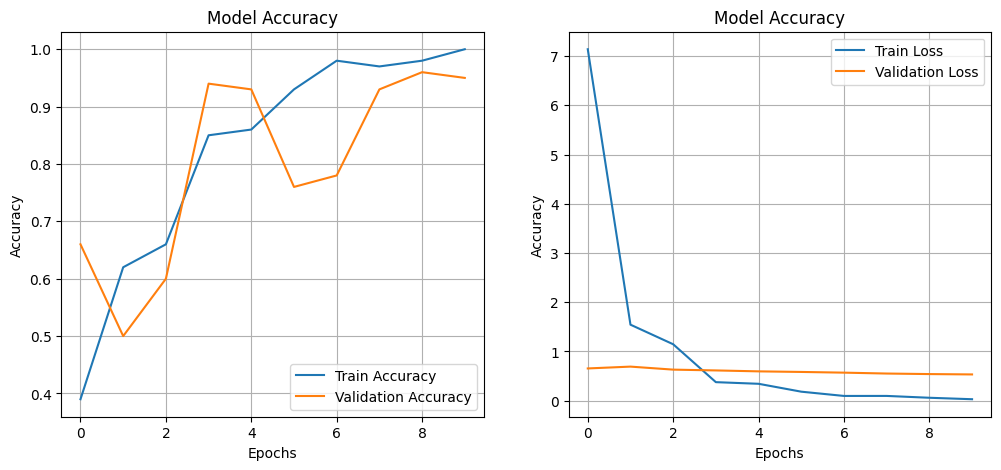

In [10]:
# @title grafik hasil training
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title("Model Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title("Model Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.grid(True)
plt




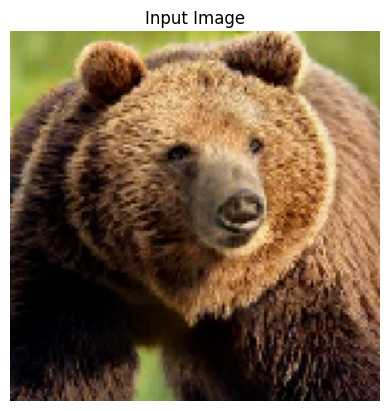

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
Prediction: Bear


In [13]:
# @title Prediksi gambar 1

img_path = "/content/drive/MyDrive/PandasBears/Validation/Bears/102.jpeg"


img = image.load_img(img_path, target_size=(150, 150))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.0


plt.imshow(img)
plt.axis("off")
plt.title("Input Image")
plt.show()

# Prediksi
prediction = model.predict(img_array)
print("Prediction:", "Panda" if prediction[0][0] > 0.5 else "Bear")


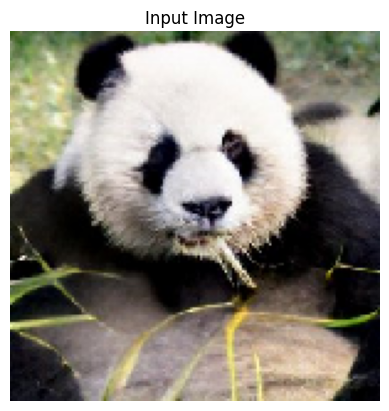

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step
Prediction: Panda


In [14]:
# @title Prediksi gambar 1

img_path = "/content/drive/MyDrive/PandasBears/Test/Pandas/210.jpeg"


img = image.load_img(img_path, target_size=(150, 150))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.0


plt.imshow(img)
plt.axis("off")
plt.title("Input Image")
plt.show()

# Prediksi
prediction = model.predict(img_array)
print("Prediction:", "Panda" if prediction[0][0] > 0.5 else "Bear")
